In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [4]:
collection_list = mongo_db.list_collection_names()

In [5]:
exp_name = "hartmann6d"
exp_name_2 = "hartmann"

In [6]:
jobs_initial5_Mk200_Mj1_exp = []
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []
#jobs_initial5_Mk100_Mj1_exp = []

jobs_saa_N5_seq5 = []

jobs_saa_cumulative_exp = []
jobs_saa_cumulative_exp_2 = []
jobs_saa_cumulative_exp_3 = []
jobs_saa_cumulative_exp_4 = []

jobs_multi_start_20_exp = []



recomm_initial5_Mk200_Mj1_exp = []
recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []
#recomm_initial5_Mk100_Mj1_exp = []

recomm_saa_N5_seq5 = []

recomm_saa_cumulative_exp = []
recomm_saa_cumulative_exp_2 = []
recomm_saa_cumulative_exp_3 = []
recomm_saa_cumulative_exp_4 = []

recomm_multi_start_20_exp = []

for i in range(100):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)])
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)])  
    if "%s_saa_N5_seq5-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_N5_seq5.append(mongo_db["%s_saa_N5_seq5-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa_test-%d.jobs"%(exp_name_2,i) in collection_list: jobs_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa_test-%d.jobs"%(exp_name_2,i)])
    if "%s_cumulative_saa_test_2-%d.jobs"%(exp_name_2,i) in collection_list: jobs_saa_cumulative_exp_2.append(mongo_db["%s_cumulative_saa_test_2-%d.jobs"%(exp_name_2,i)])
    if "%s_cumulative_saa_test_3-%d.jobs"%(exp_name_2,i) in collection_list: jobs_saa_cumulative_exp_3.append(mongo_db["%s_cumulative_saa_test_3-%d.jobs"%(exp_name_2,i)])
    if "%s_cumulative_saa_test_4-%d.jobs"%(exp_name_2,i) in collection_list: jobs_saa_cumulative_exp_4.append(mongo_db["%s_cumulative_saa_test_4-%d.jobs"%(exp_name_2,i)])
    if "%s_for_multi_start-%d.jobs"%(exp_name_2,i) in collection_list: jobs_multi_start_20_exp.append(mongo_db["%s_for_multi_start-%d.jobs"%(exp_name_2,i)])
        
    
    
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)])
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)])
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)])    
    if "%s_saa_N5_seq5-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_N5_seq5.append(mongo_db["%s_saa_N5_seq5-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa_test-%d.recommendations"%(exp_name_2,i) in collection_list: recomm_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa_test-%d.recommendations"%(exp_name_2,i)])
    if "%s_cumulative_saa_test_2-%d.recommendations"%(exp_name_2,i) in collection_list: recomm_saa_cumulative_exp_2.append(mongo_db["%s_cumulative_saa_test_2-%d.recommendations"%(exp_name_2,i)])
    if "%s_cumulative_saa_test_3-%d.recommendations"%(exp_name_2,i) in collection_list: recomm_saa_cumulative_exp_3.append(mongo_db["%s_cumulative_saa_test_3-%d.recommendations"%(exp_name_2,i)])
    if "%s_cumulative_saa_test_4-%d.recommendations"%(exp_name_2,i) in collection_list: recomm_saa_cumulative_exp_4.append(mongo_db["%s_cumulative_saa_test_4-%d.recommendations"%(exp_name_2,i)])
    if "%s_for_multi_start-%d.recommendations"%(exp_name_2,i) in collection_list: recomm_multi_start_20_exp.append(mongo_db["%s_for_multi_start-%d.recommendations"%(exp_name_2,i)])
    


### Get objective method gets the predicted optimal value in GP model

In [7]:
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)


saa_N5_seq5 = functions.get_objective(recomm_saa_N5_seq5)

saa_cumulative = functions.get_objective(recomm_saa_cumulative_exp)
saa_cumulative_2 = functions.get_objective(recomm_saa_cumulative_exp_2)
saa_cumulative_3 = functions.get_objective(recomm_saa_cumulative_exp_3)
saa_cumulative_4 = functions.get_objective(recomm_saa_cumulative_exp_4)

multi_start_20 = functions.get_objective(recomm_multi_start_20_exp)

In [8]:
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)

locs_saa_N5_seq5_exp = functions.get_recomm_loc(recomm_saa_N5_seq5)

locs_saa_cumulative_exp = functions.get_recomm_loc(recomm_saa_cumulative_exp)
locs_saa_cumulative_exp_2 = functions.get_recomm_loc(recomm_saa_cumulative_exp_2)
locs_saa_cumulative_exp_3 = functions.get_recomm_loc(recomm_saa_cumulative_exp_3)
locs_saa_cumulative_exp_4 = functions.get_recomm_loc(recomm_saa_cumulative_exp_4)

locs_multi_start_20_exp = functions.get_recomm_loc(recomm_multi_start_20_exp)

In [9]:
minimum = 35
for exp in locs_saa_cumulative_exp_4:
    minimum = minimum if len(exp) > minimum else len(exp)
    
locs_saa_cumulative_exp_4 = [list_[:minimum] for list_ in locs_saa_cumulative_exp_4]

### Getting immediate Regret IR measure

In [10]:
def hartmann(x1,x2,x3,x4,x5,x6):

	A = [[10,3,17,3.5,1.7,8],[0.05,10,17,0.1,8,14],[3,3.5,1.7,10,17,8],[17,8,0.05,10,0.1,14]]

	A = np.array(A)

	P = [[1312,1696,5569,124,8283,5886],[2329,4135,8307,3736,1004,9991],[2348,1451,3522,2883,3047,6650],[4047,8828,8732,5743,1091,381]]

	P = np.array(P)
	P = 1e-4*P

	alpha = [1.0,1.2,3.0,3.2]

	expVal = np.exp((-(A[:,0]*(x1-P[:,0])**2 + A[:,1]*(x2-P[:,1])**2 + A[:,2]*(x3-P[:,2])**2 + A[:,3]*(x4-P[:,3])**2 + A[:,4]*(x5-P[:,4])**2 + A[:,5]*(x6-P[:,5])**2)))
	y = -(alpha[0]*expVal[0] + alpha[1]*expVal[1] + alpha[2]*expVal[2] + alpha[3]*expVal[3])



	return y

In [11]:
func = hartmann

In [12]:
opt_val = -3.32237

In [13]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(func(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [14]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - func(*input_list)))

In [15]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [16]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [17]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



### Getting the "real" value of functions at suggested locations

In [18]:
sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)



sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)

sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)


sugg_obj_saa_N5_seq5_exp = get_sugg_obj_exp(locs_saa_N5_seq5_exp)

sugg_obj_saa_cumulative_exp = get_sugg_obj_exp(locs_saa_cumulative_exp)
sugg_obj_saa_cumulative_exp_2 = get_sugg_obj_exp(locs_saa_cumulative_exp_2)
sugg_obj_saa_cumulative_exp_3 = get_sugg_obj_exp(locs_saa_cumulative_exp_3)
sugg_obj_saa_cumulative_exp_4 = get_sugg_obj_exp(locs_saa_cumulative_exp_4)

sugg_obj_multi_start_20_exp = get_sugg_obj_exp(locs_multi_start_20_exp)

#### averaging values of each experiments

In [19]:
avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
avg_sugg_obj_saa_N5_seq5 = np.average(sugg_obj_saa_N5_seq5_exp, axis=0)
avg_sugg_obj_saa_cumulative = np.average(sugg_obj_saa_cumulative_exp, axis=0)
avg_sugg_obj_saa_cumulative_2 = np.average(sugg_obj_saa_cumulative_exp_2, axis=0)
avg_sugg_obj_saa_cumulative_3 = np.average(sugg_obj_saa_cumulative_exp_3, axis=0)
avg_sugg_obj_saa_cumulative_4 = np.average(sugg_obj_saa_cumulative_exp_4, axis=0)

avg_sugg_obj_multi_start_20 = np.average(sugg_obj_multi_start_20_exp, axis=0)

### Getting IR values for look optimization performances

In [20]:
irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)



irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)

irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)

irs_saa_N5_seq5_exp = get_irs_whole_exp(locs_saa_N5_seq5_exp)

irs_saa_cumulative_exp = get_irs_whole_exp(locs_saa_cumulative_exp)
irs_saa_cumulative_exp_2 = get_irs_whole_exp(locs_saa_cumulative_exp_2)
irs_saa_cumulative_exp_3 = get_irs_whole_exp(locs_saa_cumulative_exp_3)
irs_saa_cumulative_exp_4 = get_irs_whole_exp(locs_saa_cumulative_exp_4)

irs_multi_start_20_exp = get_irs_whole_exp(locs_multi_start_20_exp)

### Getting avaraged and median value of IR

In [21]:
irs_initial5_Mk200_Mj1_avg = get_avg_irs(irs_initial5_Mk200_Mj1_exp)



irs_initial5_Mk10_Mj1_avg = get_avg_irs(irs_initial5_Mk10_Mj1_exp)

irs_initial5_Mk50_Mj1_avg = get_avg_irs(irs_initial5_Mk50_Mj1_exp)

irs_saa_N5_seq5_avg = get_avg_irs(irs_saa_N5_seq5_exp)

irs_saa_cumulative_avg = get_avg_irs(irs_saa_cumulative_exp)
irs_saa_cumulative_avg_2 = get_avg_irs(irs_saa_cumulative_exp_2)
irs_saa_cumulative_avg_3 = get_avg_irs(irs_saa_cumulative_exp_3)
irs_saa_cumulative_avg_4 = get_avg_irs(irs_saa_cumulative_exp_4)

irs_multi_start_20_avg = get_avg_irs(irs_multi_start_20_exp)

In [22]:
irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)



irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)

irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)

irs_saa_N5_seq5_median = get_median_irs(irs_saa_N5_seq5_exp)

irs_saa_cumulative_median = get_median_irs(irs_saa_cumulative_exp)
irs_saa_cumulative_median_2 = get_median_irs(irs_saa_cumulative_exp_2)
irs_saa_cumulative_median_3 = get_median_irs(irs_saa_cumulative_exp_3)
irs_saa_cumulative_median_4 = get_median_irs(irs_saa_cumulative_exp_4)

irs_multi_start_20_median = get_median_irs(irs_multi_start_20_exp)

### Plotting the real function value at suggested location

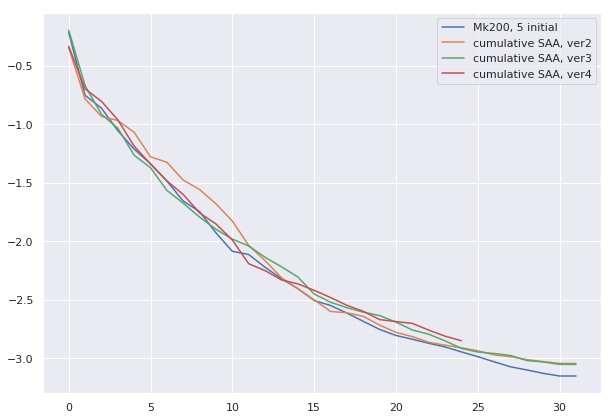

In [23]:
plt.figure(figsize=(10,7))


#plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, Mj1, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, Mj1, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

#plt.plot(avg_sugg_obj_saa_N5_seq5[3:], label="heuristic SAA")

plt.plot(avg_sugg_obj_saa_cumulative[3:], label="cumulative SAA, ver2")
plt.plot(avg_sugg_obj_saa_cumulative_3[3:], label="cumulative SAA, ver3")
plt.plot(avg_sugg_obj_saa_cumulative_4[3:], label="cumulative SAA, ver4")



plt.legend()
plt.show()

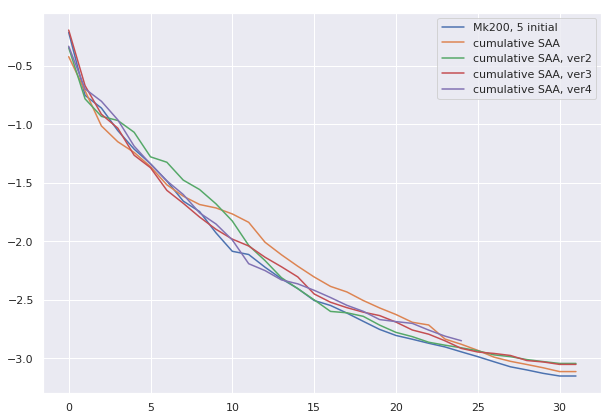

In [24]:
plt.figure(figsize=(10,7))


#plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, Mj1, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, Mj1, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

#plt.plot(avg_sugg_obj_saa_N5_seq5[3:], label="heuristic SAA")
plt.plot(avg_sugg_obj_saa_cumulative_2[3:], label="cumulative SAA")
plt.plot(avg_sugg_obj_saa_cumulative[3:], label="cumulative SAA, ver2")

plt.plot(avg_sugg_obj_saa_cumulative_3[3:], label="cumulative SAA, ver3")
plt.plot(avg_sugg_obj_saa_cumulative_4[3:], label="cumulative SAA, ver4")



plt.legend()
plt.show()

### function value; Mk50 multistart vs Mk50 single start vs Mk200 singlestart

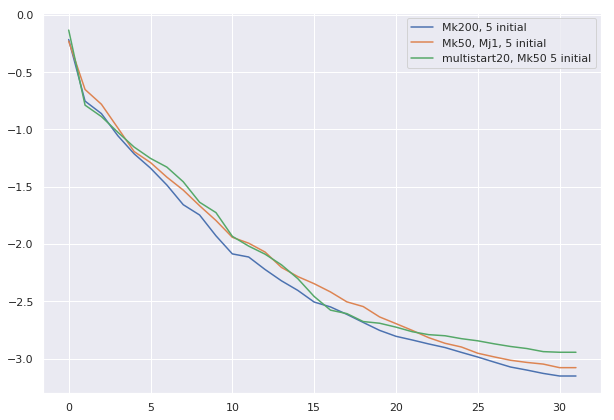

In [28]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, Mj1, 5 initial")
plt.plot(avg_sugg_obj_multi_start_20[3:], label="multistart20, Mk50 5 initial")

plt.legend()
plt.show()

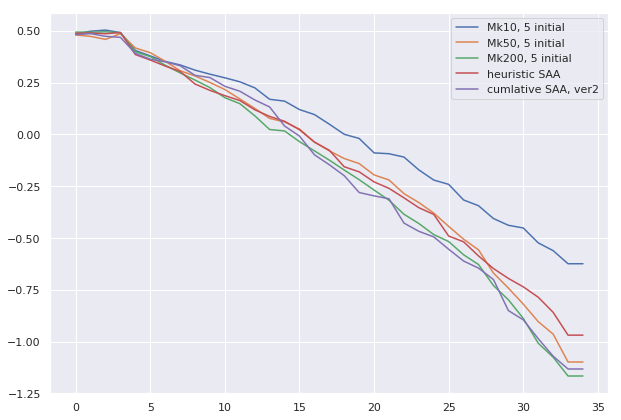

In [25]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_avg, label="Mk10, 5 initial")
plt.plot(irs_initial5_Mk50_Mj1_avg, label='Mk50, 5 initial')

plt.plot(irs_initial5_Mk200_Mj1_avg, label='Mk200, 5 initial')
plt.plot(irs_saa_N5_seq5_avg, label='heuristic SAA')

plt.plot(irs_saa_cumulative_avg, label='cumlative SAA, ver2')

plt.legend()
plt.show()

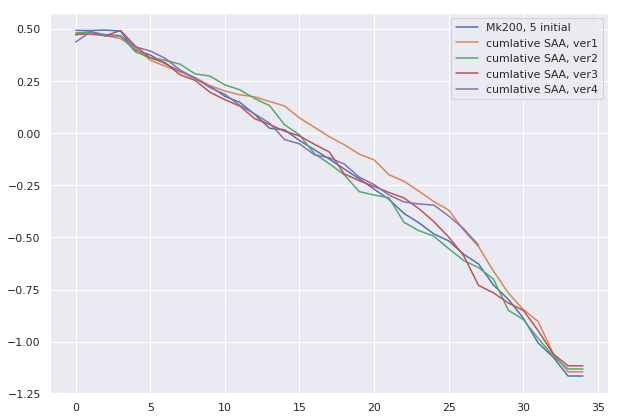

In [26]:
plt.figure(figsize=(10,7))
#plt.plot(irs_initial5_Mk10_Mj1_avg, label="Mk10, 5 initial")
#plt.plot(irs_initial5_Mk50_Mj1_avg, label='Mk50, 5 initial')

plt.plot(irs_initial5_Mk200_Mj1_avg, label='Mk200, 5 initial')
#plt.plot(irs_saa_N5_seq5_avg, label='heuristic SAA')

plt.plot(irs_saa_cumulative_avg_2, label='cumlative SAA, ver1')
plt.plot(irs_saa_cumulative_avg, label='cumlative SAA, ver2')
plt.plot(irs_saa_cumulative_avg_3, label='cumlative SAA, ver3')
plt.plot(irs_saa_cumulative_avg_4, label='cumlative SAA, ver4')

plt.legend()
plt.show()

### irs avg ; Mk50 multistart20 vs Mk50 singlestart vs Mk200 single start

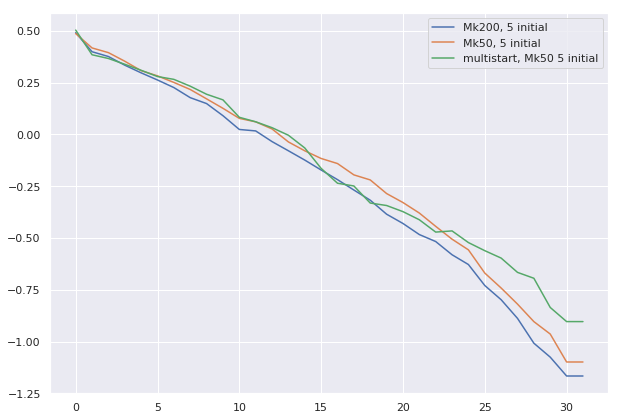

In [31]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk200_Mj1_avg[3:], label='Mk200, 5 initial')
plt.plot(irs_initial5_Mk50_Mj1_avg[3:], label='Mk50, 5 initial')
plt.plot(irs_multi_start_20_avg[3:], label='multistart, Mk50 5 initial')
plt.legend()
plt.show()

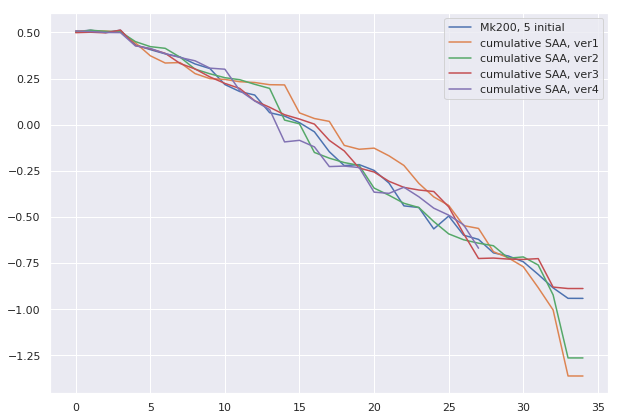

In [27]:
plt.figure(figsize=(10,7))
#plt.plot(irs_initial5_Mk10_Mj1_median, label="Mk10, 5 initial")
#plt.plot(irs_initial5_Mk50_Mj1_median, label='Mk50, 5 initial')

plt.plot(irs_initial5_Mk200_Mj1_median, label='Mk200, 5 initial')
#plt.plot(irs_saa_N5_seq5_median, label='heuristic SAA')
plt.plot(irs_saa_cumulative_median_2, label='cumulative SAA, ver1')
plt.plot(irs_saa_cumulative_median, label='cumulative SAA, ver2')
plt.plot(irs_saa_cumulative_median_3, label='cumulative SAA, ver3')
plt.plot(irs_saa_cumulative_median_4, label='cumulative SAA, ver4')

plt.legend()
plt.show()

### irs median; Mk50 multistart20 vs Mk50 single start vs Mk200 single start

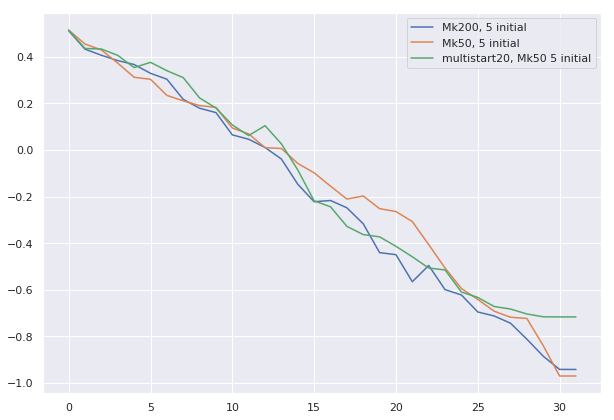

In [32]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')
plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')
plt.plot(irs_multi_start_20_median[3:],label='multistart20, Mk50 5 initial')
plt.legend()
plt.show()